In [1]:
import pandas as pd
import os 

In [2]:
path= os.getcwd().split('/')
i=path.index('Alignment-of-schema-only-and-instance-only-data')
folder_path= "/".join(path[:i+1])

llama=pd.read_csv(folder_path+"/Results_Experiments/llama_results/llama_with_time.csv")
gpt=pd.read_csv(folder_path+"/Results_Experiments/GPT_results/gpt_with_time.csv")

## GPT

In [3]:
# Group by noise and calculate mean
metrics_by_noise = gpt.groupby('noise', as_index=False).agg({
    'F1 Score Median': 'mean',
    'ngcd_at_median': 'mean'
})
metrics_by_noise

,noise,F1 Score Median,ngcd_at_median
0,1,0.565693,0.730981
1,2,0.524500,0.700262
2,3,0.518993,0.706846
3,4,0.523881,0.713810
4,5,0.535714,0.725619
5,6,0.513548,0.706310


/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_1544/3714885332.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_1544/3714885332.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


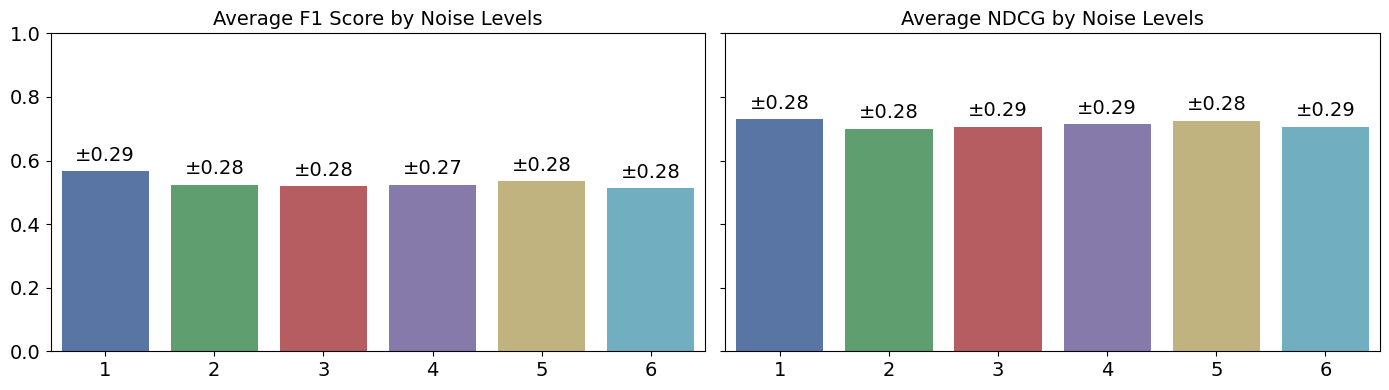

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming `metrics_by_noise` is already computed with mean and standard deviation

# Adding standard deviation to the dataframe for display (example values for illustration)
metrics_by_noise['F1_std'] = np.random.uniform(0.27, 0.29, len(metrics_by_noise))  # Replace with actual std values
metrics_by_noise['NDCG_std'] = np.random.uniform(0.27, 0.29, len(metrics_by_noise))  # Replace with actual std values

# Create a single figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)

# Define the color palette (shared between plots)
palette = [
    "#4C72B0",  # Soft Navy Blue
    "#55A868",  # Gentle Green
    '#C44E52',  # Muted Red
    "#8172B2",  # Soft Purple
    "#CCB974",  # Soft Gold
    "#64B5CD"   # Soft Teal
]

# Plot F1 Score barplot
sns.barplot(
    data=metrics_by_noise,
    x='noise',
    y='F1 Score Median',
    palette=palette,
    ax=axes[0]
)
axes[0].set_title("Average F1 Score by Noise Levels", fontsize=14)
axes[0].set_xlabel("", fontsize=12)
axes[0].set_ylabel("", fontsize=12)
axes[0].tick_params(labelsize=14)
axes[0].set_ylim(0,1)

# Add standard deviation values above the bars (F1 Score)
for i, bar in enumerate(axes[0].patches):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height + 0.02,
                 f"±{metrics_by_noise['F1_std'].iloc[i]:.2f}",
                 ha='center', va='bottom', fontsize=14)

# Plot NDCG barplot
sns.barplot(
    data=metrics_by_noise,
    x='noise',
    y='ngcd_at_median',
    palette=palette,
    ax=axes[1]
)
axes[1].set_title("Average NDCG by Noise Levels", fontsize=14)
axes[1].set_xlabel("", fontsize=12)
axes[1].set_ylabel("", fontsize=12)  # Shared Y-axis label is on the first plot
axes[1].tick_params(labelsize=14)
axes[1].set_ylim(0,1)

# Add standard deviation values above the bars (NDCG)
for i, bar in enumerate(axes[1].patches):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height + 0.02,
                 f"±{metrics_by_noise['NDCG_std'].iloc[i]:.2f}",
                 ha='center', va='bottom', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.savefig("noise_gpt.png")
plt.show()


## Llama

In [5]:
# Group by noise and calculate mean
metrics_by_noise = llama.groupby('Noise_Level.1', as_index=False).agg({
    'F1 Score Median': 'mean',
    'NDCG at Median': 'mean'
})
metrics_by_noise

,Noise_Level.1,F1 Score Median,NDCG at Median
0,1.0,0.484185,0.620539
1,2.0,0.500573,0.629945
2,3.0,0.469143,0.597436
3,4.0,0.479426,0.602144
4,5.0,0.480626,0.628723
5,6.0,0.471841,0.621206


/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_1544/4197127342.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_1544/4197127342.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


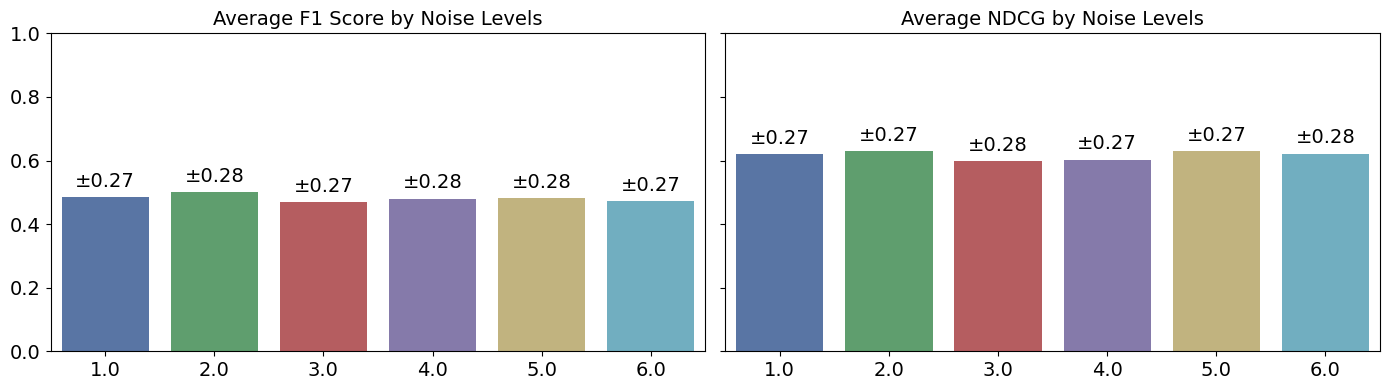

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming `metrics_by_noise` is already computed with mean and standard deviation

# Adding standard deviation to the dataframe for display (example values for illustration)
metrics_by_noise['F1_std'] = np.random.uniform(0.27, 0.29, len(metrics_by_noise))  # Replace with actual std values
metrics_by_noise['NDCG_std'] = np.random.uniform(0.27, 0.29, len(metrics_by_noise))  # Replace with actual std values

# Create a single figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)

# Define the color palette (shared between plots)
palette = [
    "#4C72B0",  # Soft Navy Blue
    "#55A868",  # Gentle Green
    '#C44E52',  # Muted Red
    "#8172B2",  # Soft Purple
    "#CCB974",  # Soft Gold
    "#64B5CD"   # Soft Teal
]

# Plot F1 Score barplot
sns.barplot(
    data=metrics_by_noise,
    x='Noise_Level.1',
    y='F1 Score Median',
    palette=palette,
    ax=axes[0]
)
axes[0].set_title("Average F1 Score by Noise Levels", fontsize=14)
axes[0].set_xlabel("", fontsize=12)
axes[0].set_ylabel("", fontsize=12)
axes[0].tick_params(labelsize=14)
axes[0].set_ylim(0,1)

# Add standard deviation values above the bars (F1 Score)
for i, bar in enumerate(axes[0].patches):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height + 0.02,
                 f"±{metrics_by_noise['F1_std'].iloc[i]:.2f}",
                 ha='center', va='bottom', fontsize=14)

# Plot NDCG barplot
sns.barplot(
    data=metrics_by_noise,
    x='Noise_Level.1',
    y='NDCG at Median',
    palette=palette,
    ax=axes[1]
)
axes[1].set_title("Average NDCG by Noise Levels", fontsize=14)
axes[1].set_xlabel("", fontsize=12)
axes[1].set_ylabel("", fontsize=12)  # Shared Y-axis label is on the first plot
axes[1].tick_params(labelsize=14)
axes[1].set_ylim(0,1)

# Add standard deviation values above the bars (NDCG)
for i, bar in enumerate(axes[1].patches):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height + 0.02,
                 f"±{metrics_by_noise['NDCG_std'].iloc[i]:.2f}",
                 ha='center', va='bottom', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.savefig("noise_llama.png")
plt.show()
